In [1]:

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.anova import AnovaRM
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

from scipy import stats
from scipy import special
import json 
from sklearn.linear_model import LogisticRegression
from scipy.optimize import curve_fit
#Import all needed libraries
from matplotlib.lines import Line2D
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from statsmodels.genmod.bayes_mixed_glm import BinomialBayesMixedGLM
from matplotlib.backends.backend_pdf import PdfPages
from statannot import add_stat_annotation
import warnings

In [2]:
df_his = pd.read_csv('df_tau_raw.csv', index_col=0)

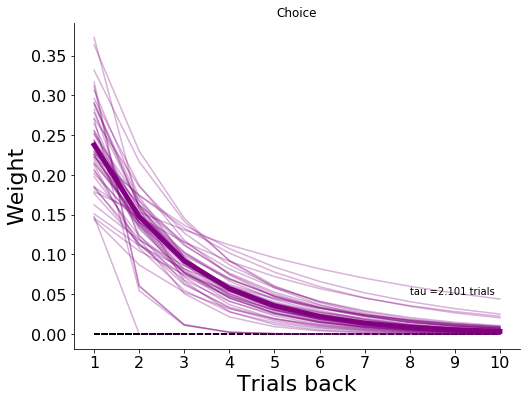

In [5]:
def exp_decay(t, N0, tau):
    return N0 * np.exp(-t / tau)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
plt.setp(ax.get_xticklabels(), fontsize=16)
plt.setp(ax.get_yticklabels(), fontsize=16)

for ind,dat in zip([0],[df_his]):
    acc_tau = []
    acc_N0 = []
    xs = np.arange(dat.shape[0])
    for animal in df_his.columns:
        try:
            popt, pcov = curve_fit(exp_decay, np.arange(len(dat[animal][1:])), dat[animal][1:],maxfev=6000)
            N0, tau = popt
            ax.plot(xs+1,N0 * np.exp(-xs /tau), color='purple',alpha=0.3)
            ax.set_title('Choice')
            ax.hlines(xmin=1,xmax=len(dat[animal][1:])+1,y=0,linestyles='dashed')
            acc_tau+=[tau]
            acc_N0+=[N0]
        except:
            print('No tau')
            acc_tau+=[2.2]
            acc_N0+=[0]
        
    ax.plot(xs+1, np.mean(acc_N0) * np.exp(-xs / np.median(acc_tau)),color='purple',linewidth=5)
    ax.text(x=8,y=0.05,s='tau ='+str(np.round(np.median(acc_tau),3))+' trials')
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
    ax.set_xlabel('Trials back', fontsize=22)
    ax.set_ylabel('Weight', fontsize=22)
    ax.set_facecolor('white')
    sns.despine()

# plt.savefig(save_path+'/taus.png', dpi =300, bbox_inches='tight')   
# plt.tight_layout()

c:\Users\Tiffany\Anaconda3\envs\envr\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\Tiffany\Anaconda3\envs\envr\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\Tiffany\Anaconda3\envs\envr\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
c:\Users\Tiffany\Anaconda3\envs\envr\lib\site-packages\scipy\optimize\minpack.py:834: OptimizeWarning: Covariance of the parameters cou

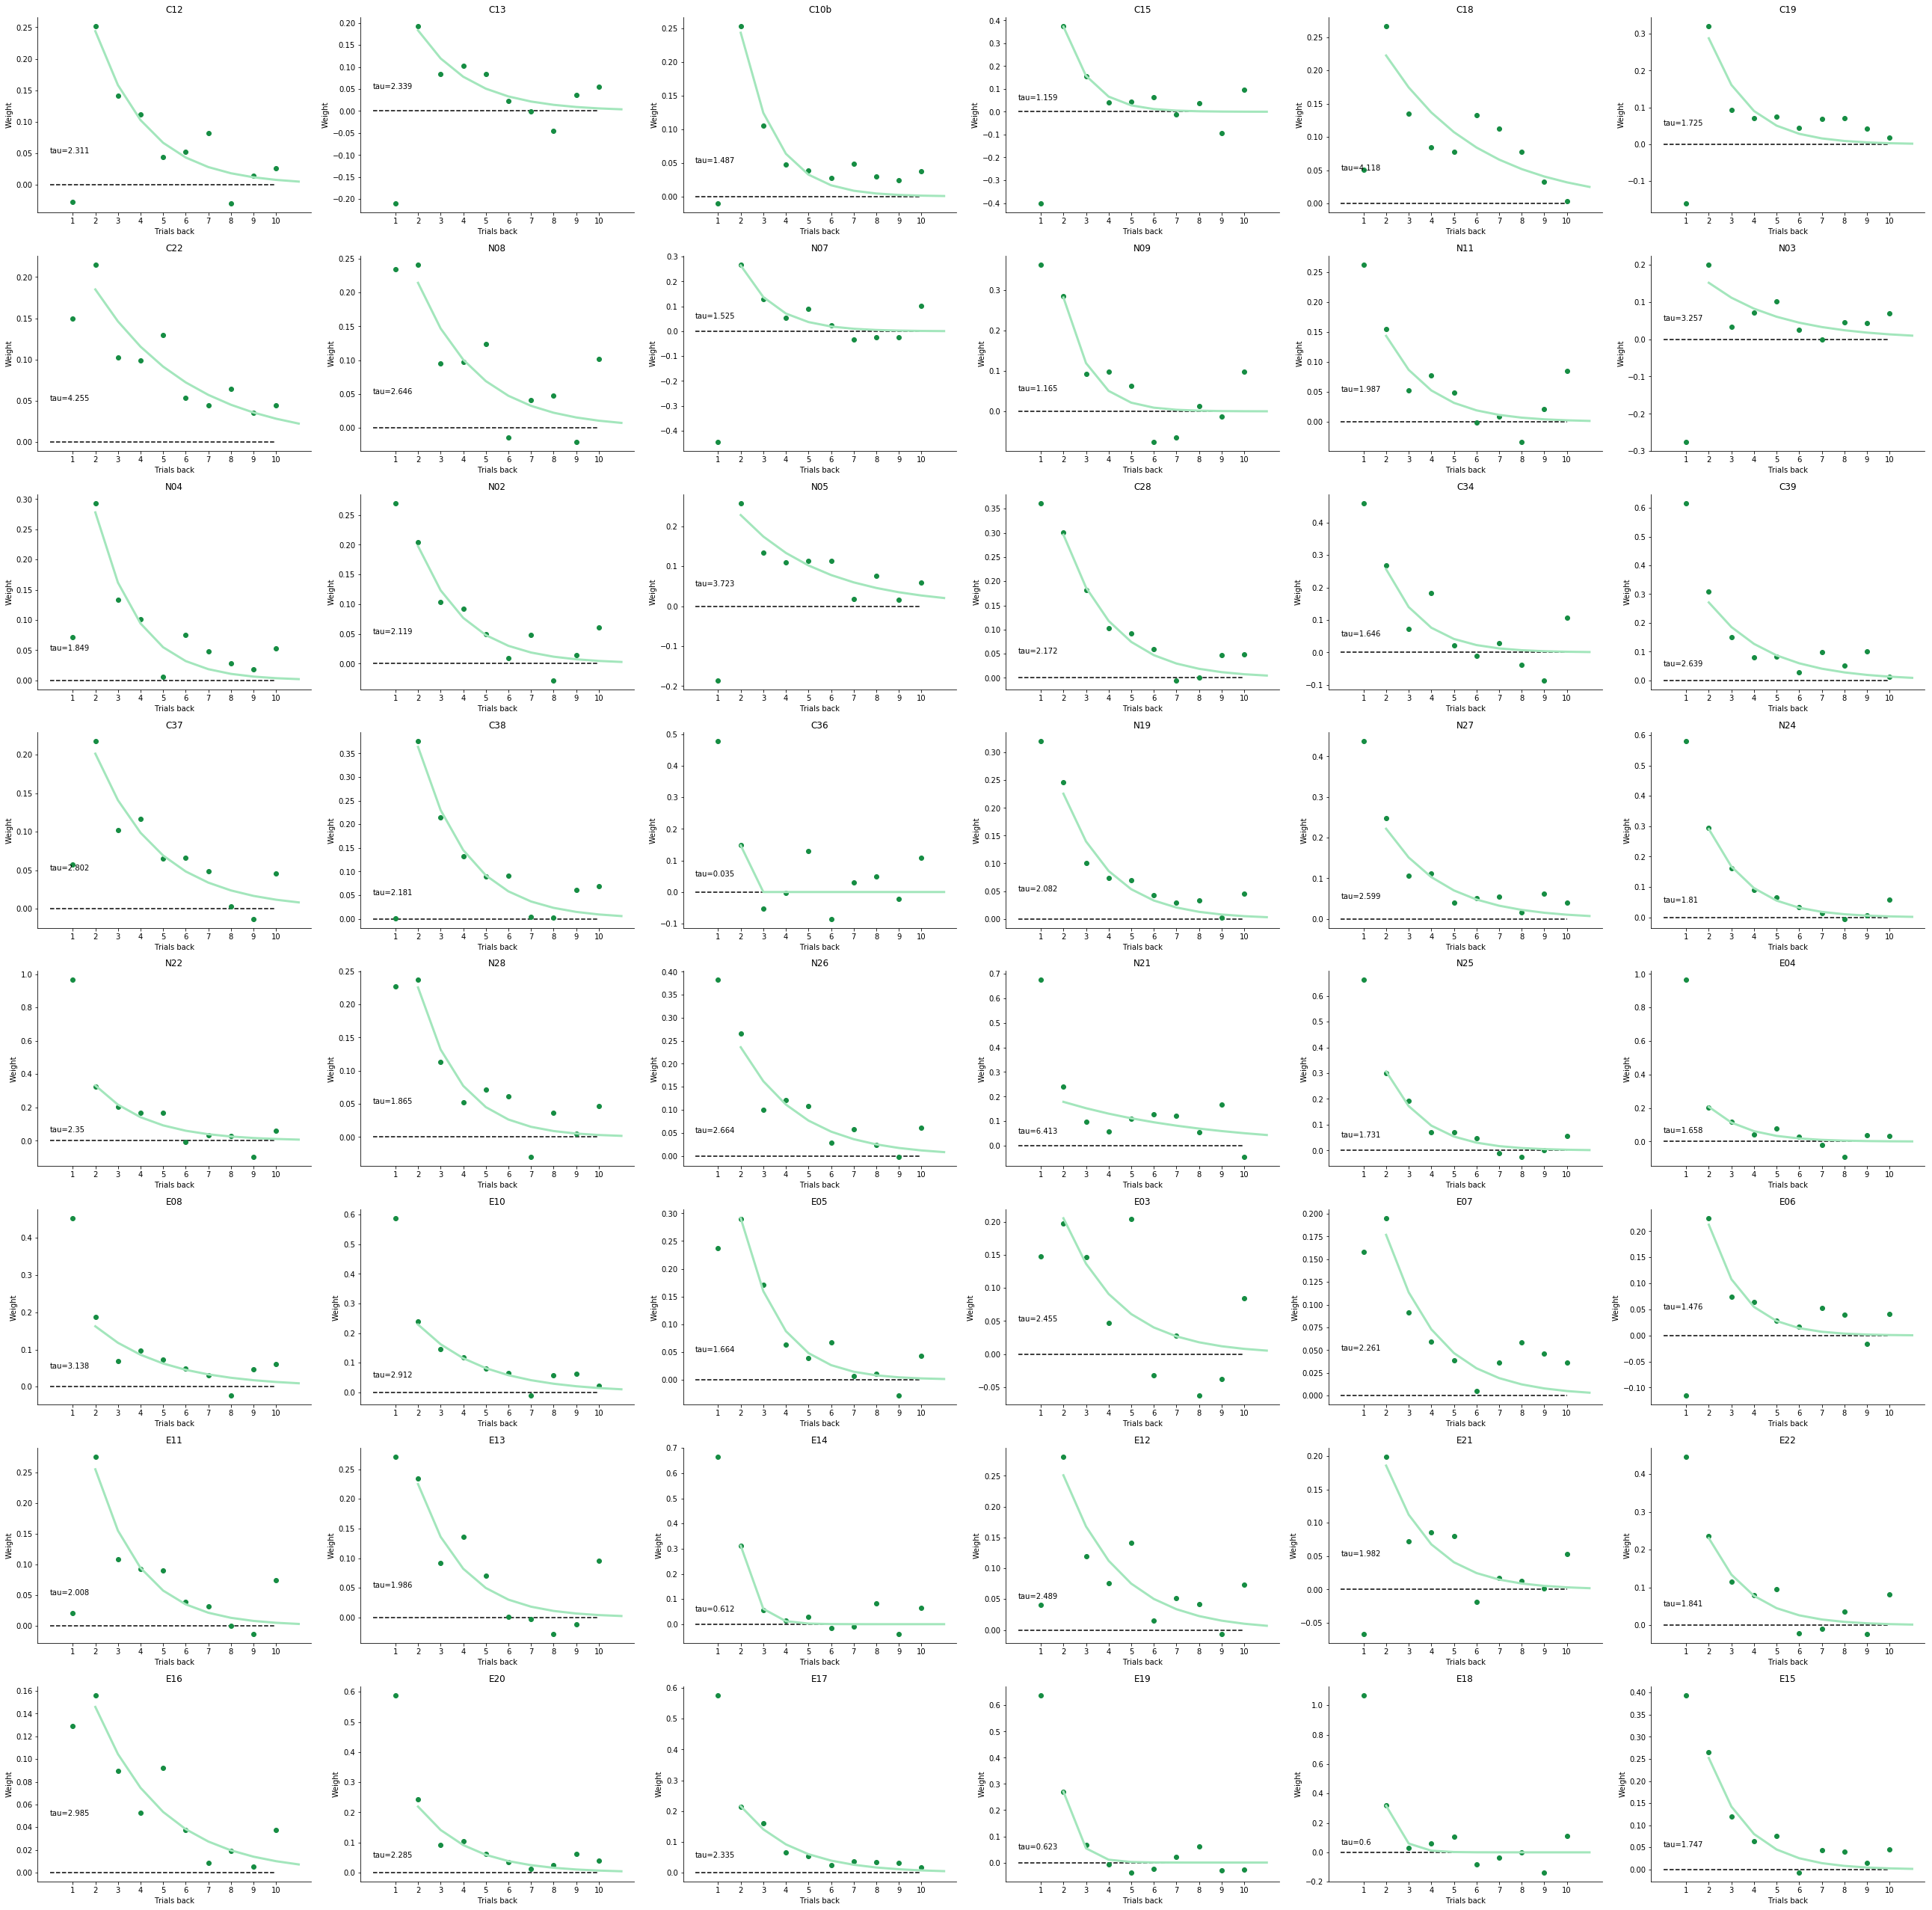

In [6]:
def exp_decay(t, N0, tau):
    return N0 * np.exp(-t / tau)

f = plt.subplots(figsize=(36, 44))

index=0
for animal in df_his.columns:
    axes = plt.subplot(10,6,index+1)
    index+=1
    for ind,dat,light,main in zip([0],[df_his],['#168D43'],['#A3E6BC']):

        popt, pcov = curve_fit(exp_decay, np.arange(len(df_his[animal][1:])), df_his[animal][1:],maxfev = 6000)
        N0, tau = popt
        xs = np.arange(len(df_his[animal]))
        axes.plot(dat[animal].index+1, df_his[animal],'o', color=light)
        
        axes.hlines(xmin=0,xmax=len(df_his[animal]),y=0,linestyles='dashed')
        
        axes.plot(xs+2, np.mean(N0) * np.exp(-xs / tau),label='Fit (tau='+str(np.round(tau,3))+')' , color=main, linewidth=3)
        axes.set_title(animal)
        if ind == 0:
            axes.text(x=0,y=0.05,s='tau='+str(np.round(np.median(tau),3)))
        
    axes.set_xlabel('Trials back')
    axes.set_ylabel('Weight')
    axes.set_xticks([1,2,3,4,5,6,7,8,9,10])
    axes.set_facecolor('white')
    sns.despine()
plt.tight_layout()

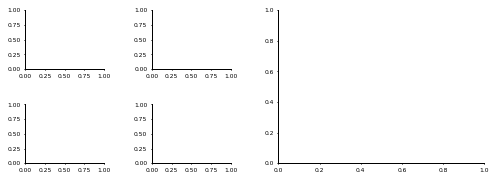

In [11]:
cm = 1/2.54
sns.set_context('paper', rc={'axes.labelsize': 7,
                            'lines.linewidth': 1, 
                            'lines.markersize': 3, 
                            'legend.fontsize': 7,  
                            'xtick.major.size': 1,
                            'xtick.labelsize': 6, 
                            'ytick.major.size': 1, 
                            'ytick.labelsize': 6,
                            'xtick.major.pad': 0,
                            'ytick.major.pad': 0,
                            'xlabel.labelpad': -10})

# Create a figure with 6 subplots using a GridSpec
fig = plt.figure(figsize=(18*cm, 6*cm))
gs = gridspec.GridSpec(nrows=2, ncols=4, figure=fig)

# Create the subplots
a1 = fig.add_subplot(gs[0, 1])
a2 = fig.add_subplot(gs[1, 1])
a3 = fig.add_subplot(gs[1, 0])
a4 = fig.add_subplot(gs[0, 0])

b = fig.add_subplot(gs[0:2, 2:4])

for panel, animal in zip([a1,a2,a3,a4],[]):
    popt, pcov = curve_fit(exp_decay, np.arange(len(df_his[animal][1:])), df_his[animal][1:],maxfev = 6000)
    N0, tau = popt
    xs = np.arange(len(df_his[animal]))
    panel.plot(dat[animal].index+1, df_his[animal],'o', color=light)
    
    panel.hlines(xmin=0,xmax=len(df_his[animal]),y=0,linestyles='dashed')
    
    panel.plot(xs+2, np.mean(N0) * np.exp(-xs / tau),label='Fit (tau='+str(np.round(tau,3))+')' , color=main, linewidth=3)
    panel.set_title(animal)
    panel.text(x=0,y=0.05,s='tau='+str(np.round(np.median(tau),3)))
        
    panel.set_xlabel('Trials back')
    panel.set_ylabel('Weight')
    panel.set_xticks([1,2,3,4,5,6,7,8,9,10])
    panel.set_facecolor('white')

sns.despine()
plt.subplots_adjust(left=0.07,
                    bottom=0.07,
                    right=0.97,
                    top=0.97,
                    wspace=0.6,
                    hspace=0.6)